# Qulacs Backend


## Introduction

This notebook shows how to import the *Qiskit-Qulacs* simulator backend and use it to run ideal (noise free).

In [56]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_qulacs import QulacsProvider
from qiskit_qulacs.qulacs_backend import QulacsBackend
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

seed = 42
np.random.seed(seed)

## The QulacsProvider



In [57]:
provider = QulacsProvider()

qulacs_simulator = provider.get_backend("qulacs_simulator")
qulacs_simulator

QulacsBackend('qulacs_simulator')

In [58]:
qulacs_simulator.available_devices()

('CPU',)

## Simulating a Quantum Circuit

The basic operation runs a quantum circuit and returns a statevector numpy array. Here we run a simple circuit that prepares a 2-qubit Bell-state $\left|\psi\right\rangle = \frac{1}{\sqrt{2}}\left(\left|00\right\rangle + \left|11 \right\rangle\right)$.

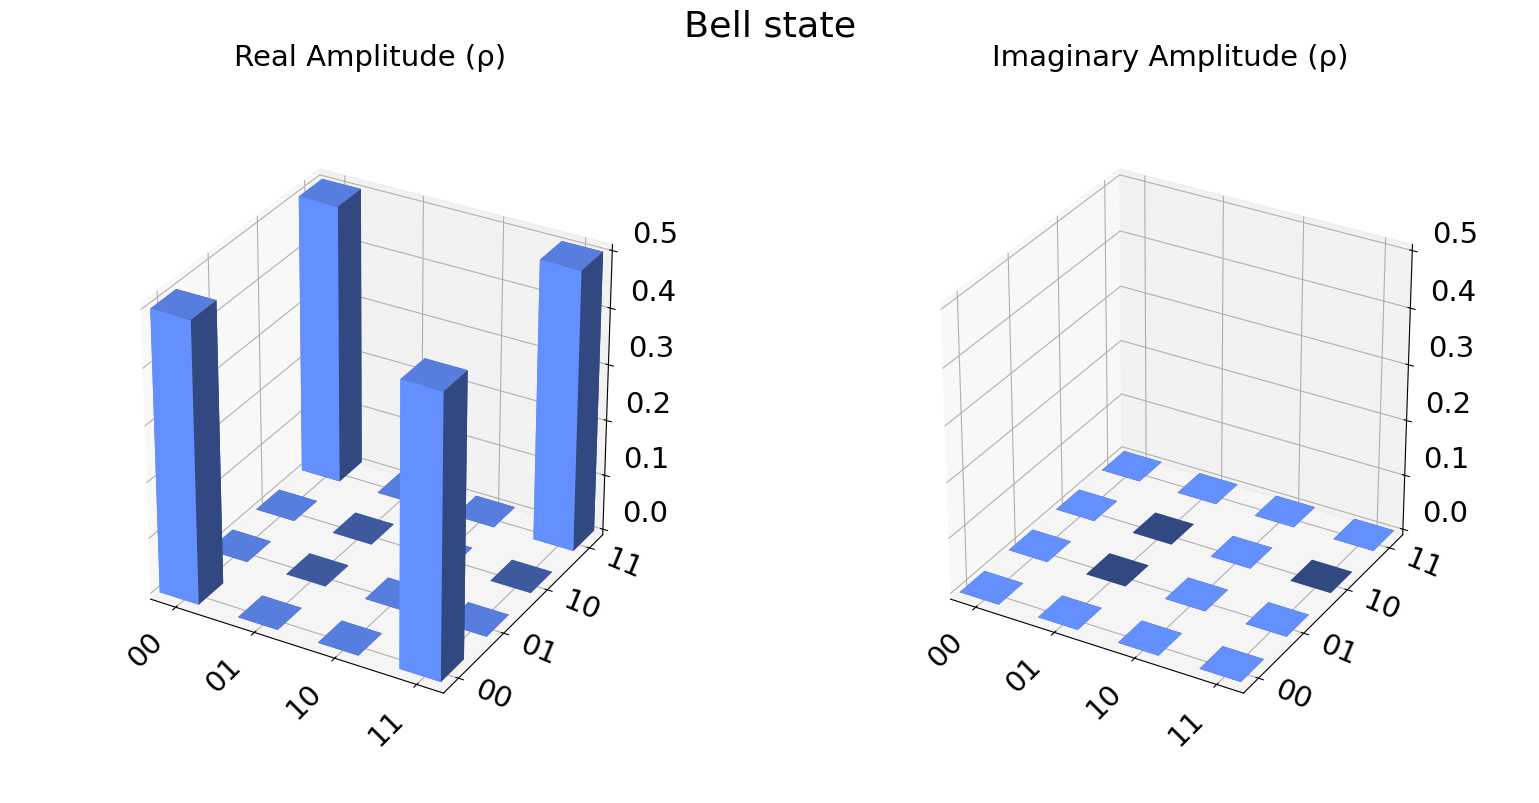

In [59]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)

# Transpile for simulator
qulacs_simulator = QulacsBackend()
circ = transpile(circ, qulacs_simulator)

# Run and get statevector
result = qulacs_simulator.run(circ).result()
statevector = result.get_statevector()
plot_state_city(statevector, title="Bell state")

### Obtaining counts

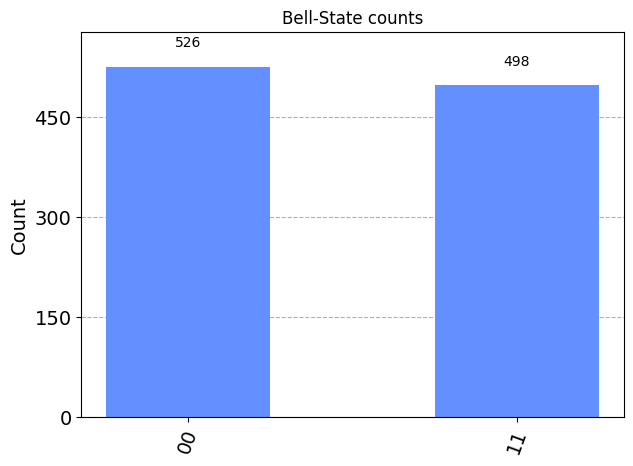

In [60]:
result = qulacs_simulator.run(circ, shots=1024, seed_simulator=seed).result()
counts = result.get_counts()
plot_histogram(counts, title="Bell-State counts")


### Returning measurement outcomes for each shot

The `QulacsBackend` also supports returning a list of measurement outcomes for each individual shot.


In [61]:
# Run and get memory
result = qulacs_simulator.run(circ, shots=10, seed_simulator=seed).result()
memory = result.get_memory()
print(memory)

['11', '11', '11', '00', '11', '00', '11', '00', '00', '00']



## Qulacs Backend Options

The `Qulacs Backend` backend supports `qulacs` configurable options which can be updated using the set_options method. See the Qiskit-Qulacs Backend API documentation for additional details.

### Quantum Circuit Optimizer

Using the `QuantumCircuitOptimizer` of the `qulacs` library, we can optimize circuit depth. See the `qulacs` [guide](https://docs.qulacs.org/en/latest/guide/2.0_python_advanced.html#Calculation-and-optimization-of-depth-of-quantum-circuits) for additional details.

In [68]:
# Create circuit
circ = QuantumCircuit(1)
for i in range(1000):
    circ.h(0)

qulacs_simulator = QulacsBackend()

backend_options = {
    "qco_enable": True,  # Enables the QuantumCircuitOptimizer
    "qco_method": "light",  # Uses light method for circuit optimization from qulacs
}

qulacs_simulator.set_options(**backend_options)

# Run and get statevector
result = qulacs_simulator.run(circ).result()
statevector = result.get_statevector()
print(statevector.real)

[1. 0.]


In [69]:
import qiskit

qiskit.__version__

'1.0.2'